In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im=cv2.imread("IMG_20180812_131323.jpg");

print(im.shape)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show();

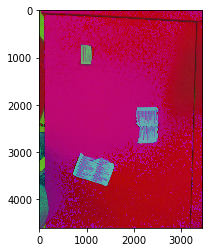

In [3]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))

255
992 942


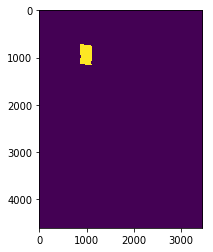

In [7]:
#print(hsv[1000][1000])
bl=(100,120,80)
bh=(150,200,120)
mask=cv2.inRange(hsv,bl,bh)
mask = cv2.dilate(mask, None, iterations=10)
print(mask[1000,1000])
plt.imshow(mask)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
M = cv2.moments(cnts[0])
x1 = int(M["m10"] / M["m00"])
y1 = int(M["m01"] / M["m00"])
print(x1,y1)

1171 3376
2288 2419


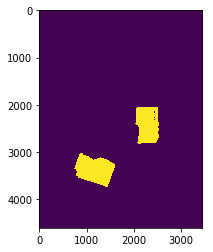

In [6]:
#print(hsv[3500][1000])
rl=(150,120,80)
rh=(200,200,120)
mask=cv2.inRange(hsv,rl,rh)
mask = cv2.dilate(mask, None, iterations=10)
plt.imshow(mask)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
M = cv2.moments(cnts[0])
x2 = int(M["m10"] / M["m00"])
y2 = int(M["m01"] / M["m00"])
print(x2,y2)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
M = cv2.moments(cnts[1])
x3 = int(M["m10"] / M["m00"])
y3 = int(M["m01"] / M["m00"])
print(x3,y3)

[ 34  67 209]
701 411


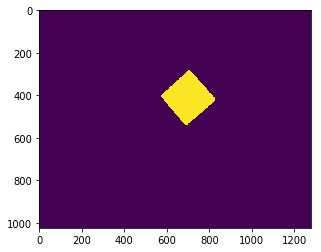

In [60]:
from pypylon import pylon

# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned


grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        im = image.GetArray()
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        #print(hsv[1000][600])
        rl1=(0,100,100)
        rh1=(10,255,255)
        mask1 = cv2.inRange(hsv,rl1,rh1)
        mask1 = cv2.dilate(mask1, None, iterations=2)
        mask1 = cv2.erode(mask1,None,iterations=3)
        rl2=(160,100,100)
        rh2=(179,255,255)
        mask2 = cv2.inRange(hsv,rl2,rh2)
        mask2 = cv2.erode(mask2,None,iterations=2)
        mask2 = cv2.dilate(mask2, None, iterations=3)
        mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
        plt.imshow(mask)
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        M = cv2.moments(cnts[0])
        xt = int(M["m10"] / M["m00"])
        yt = int(M["m01"] / M["m00"])
        print(xt,yt)
grabResult.Release()
    
# Releasing the resource    
camera.StopGrabbing()

In [ ]:
import cv2

tracker = cv2.TrackerCSRT_create()
cap=cv2.VideoCapture(0)
success, frame = cap.read()
bbox = cv2.selectROI('Tracker', frame)
print(bbox)
cv2.waitKey(1)
cv2.destroyWindow('Tracker')
success=tracker.init(frame,bbox)
while cap.isOpened():
    success, frame = cap.read()
    success, newbox = tracker.update(frame)
    if success:
        x = (newbox[0]+newbox[2])/2.0;
        y = newbox[1];
        print(x,y)
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    cv2.imshow("1",frame);
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyWindow('1')

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)   #defining the webcam

while True:
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyWindow('frame')

In [10]:
from pypylon import pylon
import cv2
# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned


grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        im = image.GetArray()
        cv2.imshow('1',im)
        cv2.waitKey(0)
        cv2.destroyWindow('1')
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        #print(hsv[1000][600])
        rl1=(0,100,100)
        rh1=(10,255,255)
        mask1 = cv2.inRange(hsv,rl1,rh1)
        mask1 = cv2.dilate(mask1, None, iterations=4)
        mask1 = cv2.erode(mask1,None,iterations=10)
        rl2=(160,100,100)
        rh2=(179,255,255)
        mask2 = cv2.inRange(hsv,rl2,rh2)
        mask2 = cv2.erode(mask2,None,iterations=4)
        mask2 = cv2.dilate(mask2, None, iterations=10)
        mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
        cv2.imshow('1',mask)
        cv2.waitKey(0)
        cv2.destroyWindow('1')        
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        M = cv2.moments(cnts[0])
        xt = int(M["m10"] / M["m00"])
        yt = int(M["m01"] / M["m00"])
        print(xt,yt)

input('change th position of the object');
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        im = image.GetArray()
        cv2.imshow('1',im)
        cv2.waitKey(0)
        cv2.destroyWindow('1')
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        #print(hsv[1000][600])
        rl1=(0,100,100)
        rh1=(10,255,255)
        mask1 = cv2.inRange(hsv,rl1,rh1)
        mask1 = cv2.dilate(mask1, None, iterations=4)
        mask1 = cv2.erode(mask1,None,iterations=10)
        rl2=(160,100,100)
        rh2=(179,255,255)
        mask2 = cv2.inRange(hsv,rl2,rh2)
        mask2 = cv2.erode(mask2,None,iterations=4)
        mask2 = cv2.dilate(mask2, None, iterations=10)
        mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
        cv2.imshow('1',mask)
        cv2.waitKey(0)
        cv2.destroyWindow('1')        
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        M = cv2.moments(cnts[0])
        xo = int(M["m10"] / M["m00"])
        yo = int(M["m01"] / M["m00"])
        print(xo,yo)
        
tracker = cv2.TrackerCSRT_create()
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
image = converter.Convert(grabResult)
frame = image.GetArray()
input('define the end effector(draw a rectangle around it)')
bbox = cv2.selectROI('Tracker', frame)
print(bbox)
cv2.waitKey(1)
cv2.destroyWindow('Tracker')
success=tracker.init(frame,bbox)
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

while grabResult.GrabSucceeded():
    image = converter.Convert(grabResult)
    frame = image.GetArray()
    success, newbox = tracker.update(frame)
    if success:
        x = (newbox[0]+newbox[2])/2.0;
        y = (newbox[1]+newbox[3])/2.0;
        print(x,y)
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    cv2.imshow("1",frame);
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

cv2.destroyWindow('1')
grabResult.Release()

581 288
change th position of the object1
747 274
define the end effector(draw a rectangle around it)1
(704, 541, 127, 90)
415.5888366699219 315.5146179199219
415.747314453125 315.4584045410156
415.7811279296875 315.7941589355469
415.5756530761719 315.7440185546875
415.7539367675781 315.6517639160156
415.5516662597656 315.6507263183594
415.6784973144531 315.5996398925781
415.7945251464844 315.61279296875
415.5673828125 315.6028137207031
415.71942138671875 315.5482482910156
415.2688789367676 315.0798645019531
415.7551574707031 315.52099609375
415.5802307128906 315.54656982421875
415.795166015625 315.5524597167969
415.58746337890625 315.56591796875
416.42456817626953 315.97348403930664
415.3175964355469 315.2989501953125
415.3080139160156 315.5691223144531
415.44482421875 315.5406188964844
415.670166015625 315.4959716796875
415.732666015625 315.7787780761719
415.892333984375 315.786865234375
415.71673583984375 315.750244140625
415.84246826171875 315.6849670410156
415.59197998046875 315.6

416.37475204467773 315.9843406677246
416.06789779663086 316.08251571655273
416.3041648864746 315.7986717224121
416.1066246032715 315.883602142334
416.33349227905273 315.97167587280273
416.18801498413086 316.0558738708496
416.46178817749023 315.77395248413086
416.242244720459 315.7570152282715
416.4007225036621 315.8324546813965
416.22570419311523 315.86449813842773
416.35692977905273 315.91909408569336
416.176570892334 315.99355697631836
416.4178123474121 316.0653648376465
416.336483001709 315.81115341186523
416.19009017944336 315.8864097595215
416.3373374938965 315.96545028686523
416.15615463256836 316.04604721069336
416.3898277282715 315.763240814209
416.18407821655273 315.75634384155273
416.34121322631836 315.7763023376465
416.285213470459 315.86754989624023
416.1086082458496 315.86669540405273
416.24697494506836 315.95959091186523
416.43508529663086 315.9691734313965
416.3104820251465 316.01269149780273
416.303768157959 315.755428314209
416.18020248413086 315.8445701599121
416.4717

416.6786422729492 316.03087997436523
416.97982025146484 315.96154403686523
416.7895736694336 316.1595115661621
416.7302780151367 316.075496673584
416.85811614990234 315.9828758239746
416.72789764404297 316.25402450561523
416.92259979248047 316.068660736084
416.7644271850586 315.9452781677246
416.5416488647461 316.216121673584
416.6980514526367 316.1639060974121
416.9033432006836 316.1464195251465
416.7790756225586 316.0631980895996
416.71385955810547 315.94628524780273
416.8994674682617 316.13439559936523
416.73360443115234 316.12832260131836
416.97481536865234 315.98318099975586
416.8890609741211 316.249324798584
416.8705368041992 316.17370223999023
416.6958541870117 316.0843162536621
416.9078598022461 315.92995834350586
416.7040023803711 316.186336517334
417.0551986694336 316.09435653686523
416.9717330932617 316.090877532959
416.7918930053711 316.074275970459
416.6455612182617 315.9999656677246
416.89290618896484 316.20998764038086
416.67403411865234 316.2123680114746
416.88555145263

417.2780990600586 316.0959129333496
417.19860076904297 316.0712242126465
417.49678802490234 316.06274032592773
417.3385238647461 316.1313133239746
417.2996139526367 316.15600204467773
417.1831283569336 316.1942710876465
417.45137786865234 316.13869857788086
417.41857147216797 316.22085189819336
417.30199432373047 316.2331199645996
417.2510299682617 316.19436264038086
417.24373626708984 316.1666831970215
417.5348434448242 316.17141342163086
417.57372283935547 316.1364097595215
417.4588851928711 316.2046775817871
417.4500045776367 316.2133445739746
417.3905563354492 316.2675437927246
417.3594284057617 316.28872299194336
417.3956832885742 316.315242767334
417.2851791381836 316.3287925720215
417.20507049560547 316.41738510131836
417.60945892333984 316.37990951538086
417.5554428100586 316.44277572631836
417.5439682006836 316.449031829834
417.45308685302734 316.4728355407715
416.8148002624512 316.154354095459
417.41197967529297 316.38293075561523
417.3163070678711 316.48208236694336
417.2560

417.7716598510742 316.8251304626465
417.66063690185547 316.8793296813965
417.90355682373047 316.89098739624023
417.87410736083984 316.93532943725586
417.7531967163086 316.93249130249023
417.6308822631836 316.9179039001465
417.8937301635742 316.84817123413086
417.8159713745117 316.91186141967773
417.77965545654297 316.96194076538086
417.73030853271484 316.97463607788086
417.9954147338867 316.9618797302246
417.90929412841797 317.0160789489746
417.89253997802734 316.82043075561523
417.7914047241211 316.87929916381836
417.77059173583984 316.9264793395996
417.77449798583984 316.9386558532715
417.1075553894043 316.60061264038086
418.12609100341797 316.8225975036621
417.9974594116211 316.88952255249023
417.89415740966797 316.97863388061523
417.9159469604492 316.99608993530273
417.2256889343262 316.6274070739746
417.86168670654297 316.84853744506836
417.85677337646484 316.96596908569336
417.74779510498047 316.9208641052246
418.03343963623047 316.9457664489746
417.97924041748047 316.94451522827

418.15193939208984 317.4906883239746
418.24459075927734 317.6261558532715
418.3899154663086 317.4867820739746
418.0720748901367 317.58800888061523
418.2409896850586 317.3830223083496
418.21736907958984 317.52444076538086
418.41637420654297 317.3689842224121
418.12902069091797 317.49840927124023
418.17992401123047 317.62963485717773
418.27111053466797 317.45559310913086
417.90560150146484 317.616756439209
418.1007308959961 317.4643211364746
418.2466049194336 317.57619857788086
418.46373748779297 317.45315170288086
418.20149993896484 317.5755271911621
418.29186248779297 317.4511375427246
417.3692436218262 317.12368392944336
418.11324310302734 317.415584564209
418.23436737060547 317.60403060913086
417.7836112976074 317.06863021850586
418.1474838256836 317.42650985717773
417.6441764831543 317.160213470459
417.4719352722168 317.109188079834
418.23534393310547 317.4402732849121
417.7205009460449 317.17419052124023
418.14330291748047 317.5458641052246
418.25634002685547 317.4664878845215
417.

418.22554779052734 317.8435935974121
418.52596282958984 317.93554306030273
417.8381767272949 317.58922958374023
418.4754867553711 317.81969833374023
418.42842864990234 317.8944969177246
418.32747650146484 317.9797019958496
418.3379440307617 318.07152938842773
418.2385787963867 317.7999839782715
418.5277328491211 317.86281967163086
418.4801559448242 317.9902000427246
418.4193344116211 318.04137802124023
418.31966400146484 317.76000595092773
418.31209564208984 317.889705657959
418.23433685302734 317.95495223999023
418.4491195678711 318.065975189209
418.38021087646484 317.8548240661621
418.26415252685547 317.909725189209
418.2638473510742 318.0431785583496
418.2839889526367 317.769832611084
418.2273483276367 317.89236068725586
418.4984359741211 318.01427841186523
418.43773651123047 317.84276962280273
418.2853012084961 317.89455795288086
418.24947357177734 317.989559173584
418.4901657104492 318.0893211364746
418.3942184448242 317.9031639099121
418.3922653198242 317.95583724975586
418.30919

418.65242767333984 318.10815048217773
418.67540740966797 317.9618492126465
418.63060760498047 318.09341049194336
418.6439437866211 318.00158309936523
418.63280487060547 317.90395736694336
418.65489959716797 318.07204818725586
418.73751068115234 317.98415756225586
418.75753021240234 318.22048568725586
418.4442367553711 318.1412010192871
418.41210174560547 318.0490074157715
418.41173553466797 317.98644638061523
418.4249496459961 318.19240951538086
418.5584945678711 318.13146591186523
418.6853256225586 318.11181259155273
418.7168197631836 318.04272079467773
418.7249069213867 318.0353355407715
419.4133605957031 318.3202819824219
418.2516403198242 317.9941062927246
418.3264694213867 318.1998863220215
418.43575286865234 318.1049461364746
418.5262985229492 318.0701560974121
418.51342010498047 317.99636459350586
418.55062103271484 318.2460594177246
418.55590057373047 318.2022361755371
418.67967987060547 318.18960189819336
418.69771575927734 318.10998153686523
418.7321090698242 318.103878021240

418.8766403198242 318.41479110717773
418.56798553466797 318.42629623413086
418.6638717651367 318.4118003845215
418.1521110534668 318.07958602905273
418.60717010498047 318.3370933532715
418.75634002685547 318.45751571655273
417.94086837768555 318.08080673217773
418.7053756713867 318.35155868530273
418.81957244873047 318.4567527770996
418.54097747802734 318.4577293395996
418.6006088256836 318.48366928100586
418.67967987060547 318.4925193786621
418.8452682495117 318.56203842163086
418.6481246948242 318.2168846130371
418.7772750854492 318.25219345092773
418.5288314819336 318.35549545288086
418.59239959716797 318.38955307006836
418.7104721069336 318.4586753845215
418.1388053894043 318.1416893005371
418.5890426635742 318.3863182067871
418.0483512878418 318.0682029724121
418.83016204833984 318.3131675720215
418.55944061279297 318.3724937438965
418.6748580932617 318.44179916381836
418.17512130737305 318.0723533630371
418.64998626708984 318.32104110717773
418.7885971069336 318.4417381286621
418

418.07645416259766 318.1878890991211
418.2953872680664 318.1776351928711
418.1029739379883 318.16231536865234
418.27689361572266 318.18981170654297
418.06034088134766 318.12206268310547
418.2872085571289 318.06453704833984
418.7917671203613 318.46654510498047
417.97183990478516 318.2296676635742
418.18375396728516 318.21248626708984
418.0887222290039 318.1600570678711
418.2926712036133 318.09020233154297
418.16788482666016 318.0671920776367
418.71452713012695 318.4619369506836
418.24112701416016 318.3077621459961
418.02567291259766 318.3457565307617
418.2164993286133 318.3629684448242
418.0164566040039 318.30684661865234
418.1841812133789 318.3361129760742
417.9910354614258 318.3295211791992
418.2160415649414 318.3208541870117
418.12647247314453 318.2562484741211
418.3851089477539 318.27696990966797
418.17704010009766 318.28600311279297
418.0159378051758 318.23168182373047
418.27808380126953 318.2432174682617
418.1732864379883 318.2397689819336
418.05286407470703 318.22066497802734
418

417.4483947753906 318.24292373657227
418.1918411254883 318.462833404541
418.10535430908203 318.6729164123535
418.28723907470703 318.5376319885254
418.1276626586914 318.69528579711914
418.04825592041016 318.506290435791
418.1330337524414 318.72800064086914
418.14176177978516 318.53793716430664
417.36724853515625 318.23642349243164
418.13709259033203 318.4452247619629
417.4283447265625 318.14279556274414
418.11905670166016 318.342227935791
418.38748931884766 318.56320571899414
418.2717056274414 318.377384185791
418.09583282470703 318.5506935119629
417.6300964355469 318.3033790588379
418.0448989868164 318.5347328186035
418.2033462524414 318.714298248291
417.438232421875 318.17847061157227
418.2042922973633 318.3821449279785
418.06290435791016 318.5277442932129
418.25284576416016 318.7551918029785
418.1410903930664 318.6423988342285
418.09720611572266 318.466739654541
418.3482131958008 318.7223243713379
418.24475860595703 318.5542335510254
417.4810791015625 318.3108253479004
418.1993484497

417.3888244628906 318.50802993774414
417.5223693847656 318.4893226623535
417.35565185546875 318.42505264282227
417.50726318359375 318.3791847229004
417.63531494140625 318.3566017150879
417.4690856933594 318.315128326416
417.5764465332031 318.1828956604004
417.4317932128906 318.17871475219727
418.17322540283203 318.5524024963379
417.45928955078125 318.5278663635254
417.5971374511719 318.46655654907227
417.4155578613281 318.4404640197754
417.5184631347656 318.3992042541504
417.35919189453125 318.376407623291
417.50970458984375 318.33066177368164
417.67718505859375 318.2713966369629
417.49041748046875 318.21704483032227
417.53753662109375 318.1470069885254
417.3444519042969 318.0354652404785
417.3962097167969 318.3894691467285
417.49169921875 318.3440284729004
417.5670166015625 318.29858779907227
417.36407470703125 318.3336524963379
417.4789123535156 318.3143653869629
417.5595397949219 318.34787368774414
417.3789367675781 318.327823638916
417.4958190917969 318.24670791625977
417.641937255

417.70677947998047 318.59339141845703
417.00157928466797 318.25622940063477
417.5963363647461 318.60535430908203
416.9039535522461 318.27734756469727
417.77950286865234 318.5776138305664
417.0078353881836 318.2804298400879
417.59871673583984 318.58545684814453
416.94860076904297 318.28467178344727
416.9430465698242 318.21277236938477
417.50096893310547 318.57678985595703
417.1051254272461 318.35556411743164
417.1453170776367 318.22433853149414
417.6992416381836 318.59449005126953
417.0095443725586 318.3085060119629
417.0519027709961 318.22714614868164
417.61544036865234 318.57837677001953
417.0171127319336 318.2978858947754
416.97533416748047 318.2346839904785
416.9566879272461 318.2048988342285
417.4996871948242 318.5996780395508
417.2206344604492 318.37720108032227
417.15767669677734 318.36328506469727
417.1511459350586 318.30127334594727
417.12303924560547 318.2595863342285
417.0394821166992 318.23996353149414
416.99681854248047 318.25888442993164
417.0162582397461 318.2207679748535

417.4207572937012 318.869686126709
417.1768913269043 318.6784019470215
417.2401237487793 318.8714256286621
417.33271408081055 318.69155502319336
417.42475509643555 318.9084129333496
417.0961723327637 318.66552352905273
417.17975997924805 318.87234115600586
417.2585868835449 318.69717025756836
417.3642692565918 318.89452743530273
417.49103927612305 318.71023178100586
417.27778244018555 318.52733993530273
417.4033622741699 318.6689109802246
417.4081230163574 318.86669540405273
417.60419845581055 318.71841049194336
417.3779411315918 318.5748863220215
417.4880790710449 318.757137298584
417.2659721374512 318.5883445739746
417.3615531921387 318.74108505249023
417.4720268249512 318.577205657959
417.22187423706055 318.77712631225586
417.3407402038574 318.63341903686523
417.5046501159668 318.80923080444336
417.31281661987305 318.6161766052246
417.34882736206055 318.82119369506836
417.4902458190918 318.725154876709
417.2860221862793 318.5075035095215
417.4642448425293 318.725643157959
417.198070

417.51288986206055 318.82094955444336
417.41218185424805 318.8305015563965
417.7509880065918 318.82217025756836
417.6376152038574 318.83572006225586
417.5885124206543 318.8419761657715
417.4805717468262 318.807186126709
417.2967948913574 318.749080657959
417.5418510437012 318.71789169311523
418.0163383483887 319.1181335449219
417.6758232116699 319.0846519470215
417.5833549499512 319.08080673217773
417.4909782409668 319.0583152770996
417.4126091003418 319.05068588256836
417.6923637390137 319.041072845459
417.6475639343262 318.984188079834
417.51960372924805 318.8971519470215
417.41791915893555 318.9012107849121
417.76093673706055 318.90664291381836
417.6556205749512 318.8986473083496
417.60212326049805 318.8295249938965
417.5066947937012 318.87047958374023
417.4233207702637 318.8619041442871
417.3755302429199 318.866512298584
417.71979904174805 318.8099021911621
417.6186637878418 318.816219329834
417.56184005737305 318.8031883239746
417.46528244018555 318.85940170288086
417.364360809326

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pypylon import pylon
import cv2
# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

cv2.namedWindow('1',cv2.WINDOW_NORMAL)
cv2.resizeWindow('1',600,600)
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
while grabResult.GrabSucceeded():
    image = converter.Convert(grabResult)
    frame = image.GetArray()
    frame=frame[82:797,400:1120]
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('1',frame);
    rl1=(0,100,100)
    rh1=(10,255,255)
    mask1 = cv2.inRange(hsv,rl1,rh1)
    mask1 = cv2.dilate(mask1, None, iterations=4)
    mask1= cv2.erode(mask1,None,iterations=10)
    rl2=(160,100,100)
    rh2=(179,255,255)
    mask2 = cv2.inRange(hsv,rl2,rh2)
    mask2 = cv2.dilate(mask2, None, iterations=4)
    mask2 = cv2.erode(mask2,None,iterations=10)
    mask=cv2.addWeighted(mask1,1.0,mask2,1.0,0.0)
    cv2.imshow('2',mask)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        cv2.destroyWindow('1')
        cv2.destroyWindow('2')
        break
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    
grabResult.Release()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pypylon import pylon
import cv2
# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

#cv2.namedWindow('1',cv2.WINDOW_NORMAL)
#cv2.resizeWindow('1',600,600)
grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
while grabResult.GrabSucceeded():
    image = converter.Convert(grabResult)
    frame = image.GetArray()
    frame=frame[85:690,405:1115]
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    rl1=(40,100,50)
    rh1=(85,255,255)
    mask1 = cv2.inRange(hsv,rl1,rh1)
    mask1 = cv2.dilate(mask1, None, iterations=4)
    m= cv2.erode(mask1,None,iterations=12)
    y=m.shape[0]-1
    while y>0:
        x=0
        while x<m.shape[1]:
            if m[y,x]==255:
                break
            x+=1
        if x==m.shape[1] and y+1<m.shape[0]:
            ye=y+1
            i=x-1
            while i>0:
                if m[ye,i]==255:
                    xe=i
                    while m[ye,xe]==255:
                        xe+=1
                    xe=(xe+i)/2.0
                    i=-1
                    y=-1
                    break
                i-=1
        y-=1
    print(xe,ye)
    #input()
    cv2.imshow('1',frame);
    cv2.imshow('2',mask1)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        cv2.destroyAllWindows()
        break
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    
grabResult.Release()

330.5 575
356.5 588
410.5 580
386.5 599
385.5 598
374.5 320
363.5 574
338.5 602
410.5 578
350.5 602
379.5 322
375.5 584
379.5 544
367.5 596
365.5 579
373.5 549
341.5 599
409.5 541
409.5 546
379.5 562
340.5 560
364.5 566
389.5 602
410.5 583
377.5 599
411.5 604
411.5 599
374.5 318
346.5 596
410.5 586
373.5 320
342.5 575
410.5 568
374.5 318
410.5 580
410.5 568
409.5 545
374.5 596
390.5 603
374.5 320
374.5 318
408.5 554
371.5 557
331.5 578
357.5 604
408.5 544
408.5 541
370.5 604
409.5 553
331.5 570
379.5 586
331.5 598
340.5 600
343.5 562
334.5 600
409.5 558
411.5 600
411.5 601
411.5 594
377.5 320
333.5 604
377.5 320
334.5 602
333.5 604
333.5 583
377.5 320
332.5 602
411.5 596
410.5 568
390.5 603
339.5 599
387.5 596
375.5 583
374.5 318
369.5 541
371.5 562
372.5 604
374.5 319
349.5 586
374.5 318
369.5 602
373.5 318
345.5 598
381.5 582
377.5 320
371.5 596
410.5 568
411.5 599
409.5 549
375.5 600
360.5 599
333.5 599
374.5 318
337.5 587
349.5 598
408.5 544
330.5 604
378.5 320
379.5 322
377.5 556
